In [49]:
#libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [50]:
#loading the data
df=pd.read_csv("hotel_bookings.csv")

EDA/PREPROCESSING

In [51]:
df.shape

(36275, 19)

In [52]:
df.head(5)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001           NaN             NaN                   NaN   
1   INN00002           2.0             0.0                   2.0   
2   INN00003           1.0             0.0                   2.0   
3   INN00004           2.0             0.0                   0.0   
4   INN00005           2.0             0.0                   1.0   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                NaN               NaN                         NaN   
1                3.0      Not Selected                         0.0   
2                1.0       Meal Plan 1                         0.0   
3                2.0       Meal Plan 1                         0.0   
4                1.0      Not Selected                         0.0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0                NaN        NaN           NaN            NaN           NaN   
1        Room_Type 1        5.0        2018.0           11.0           6.0   
2        Room_Type 1        1.0        2018.0            2.0          28.0   
3        Room_Type 1      211.0        2018.0            5.0          20.0   
4        Room_Type 1       48.0        2018.0            4.0          11.0   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                 NaN             NaN                           NaN   
1              Online             0.0                           0.0   
2              Online             0.0                           0.0   
3              Online             0.0                           0.0   
4              Online             0.0                           0.0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                   NaN                 NaN   
1                                   0.0              106.68   
2                                   0.0               60.00   
3                                   0.0              100.00   
4                                   0.0               94.50   

   no_of_special_requests booking_status  
0                     NaN   Not_Canceled  
1                     1.0   Not_Canceled  
2                     0.0       Canceled  
3                     0.0       Canceled  
4                     0.0       Canceled

In [53]:
df.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  35862.000000    35951.000000          35908.000000        35468.00000   
mean       1.845017        0.105366              0.810209            2.20331   
std        0.518652        0.402871              0.870857            1.40989   
min        0.000000        0.000000              0.000000            0.00000   
25%        2.000000        0.000000              0.000000            1.00000   
50%        2.000000        0.000000              1.000000            2.00000   
75%        2.000000        0.000000              2.000000            3.00000   
max        4.000000       10.000000              7.000000           17.00000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                33683.000000  35803.000000  35897.000000   35771.000000   
mean                     0.030698     85.276569   2017.820431       7.424031   
std                      0.172501     85.998845      0.383834       3.068277   
min                      0.000000      0.000000   2017.000000       1.000000   
25%                      0.000000     17.000000   2018.000000       5.000000   
50%                      0.000000     57.000000   2018.000000       8.000000   
75%                      0.000000    126.000000   2018.000000      10.000000   
max                      1.000000    443.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count  35294.000000    35689.000000                  35778.000000   
mean      15.605712        0.025666                      0.023646   
std        8.743484        0.158140                      0.370835   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          35725.000000        35815.000000   
mean                               0.154458          103.418207   
std                                1.764805           35.057342   
min                                0.000000            0.000000   
25%                                0.000000           80.300000   
50%                                0.000000           99.450000   
75%                                0.000000          120.000000   
max                               58.000000          540.000000   

       no_of_special_requests  
count            35486.000000  
mean                 0.619343  
std                  0.785849  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  5.000000

In [54]:
df.isna().sum()

Booking_ID                                 0
no_of_adults                             413
no_of_children                           324
no_of_weekend_nights                     367
no_of_week_nights                        807
type_of_meal_plan                        526
required_car_parking_space              2592
room_type_reserved                      1171
lead_time                                472
arrival_year                             378
arrival_month                            504
arrival_date                             981
market_segment_type                     1512
repeated_guest                           586
no_of_previous_cancellations             497
no_of_previous_bookings_not_canceled     550
avg_price_per_room                       460
no_of_special_requests                   789
booking_status                             0
dtype: int64

In [55]:
df=df.drop(['Booking_ID','arrival_date'] , axis=1)

In [56]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [57]:
df['booking_status'].value_counts()
df['type_of_meal_plan'].value_counts()


type_of_meal_plan
Meal Plan 1     27421
Not Selected     5057
Meal Plan 2      3266
Meal Plan 3         5
Name: count, dtype: int64

In [58]:
df['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     27421
Not Selected     5057
Meal Plan 2      3266
Meal Plan 3         5
Name: count, dtype: int64

In [59]:
df['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    27234
Room_Type 4     5851
Room_Type 6      939
Room_Type 2      664
Room_Type 5      256
Room_Type 7      154
Room_Type 3        6
Name: count, dtype: int64

In [60]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['booking_status']=le.fit_transform(df['booking_status'])


In [61]:
df['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     27421
Not Selected     5057
Meal Plan 2      3266
Meal Plan 3         5
Name: count, dtype: int64

In [62]:
df['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    27234
Room_Type 4     5851
Room_Type 6      939
Room_Type 2      664
Room_Type 5      256
Room_Type 7      154
Room_Type 3        6
Name: count, dtype: int64

In [63]:
df = df[df['room_type_reserved'] != 'Room_Type 3']
df = df[df['type_of_meal_plan'] != 'Meal Plan 3']

In [64]:
#imputation
df.fillna({'avg_price_per_room':df['avg_price_per_room'].median()},inplace=True)
df.fillna({'no_of_previous_bookings_not_canceled':df['no_of_previous_bookings_not_canceled'].median()},inplace=True)
df.fillna({'no_of_weekend_nights':df['no_of_weekend_nights'].median()},inplace=True)
df.fillna({'no_of_previous_cancellations':df['no_of_previous_cancellations'].median()},inplace=True)
df.fillna({'repeated_guest':df['repeated_guest'].median()},inplace=True)
df.fillna({'required_car_parking_space':df['required_car_parking_space'].median()},inplace=True)

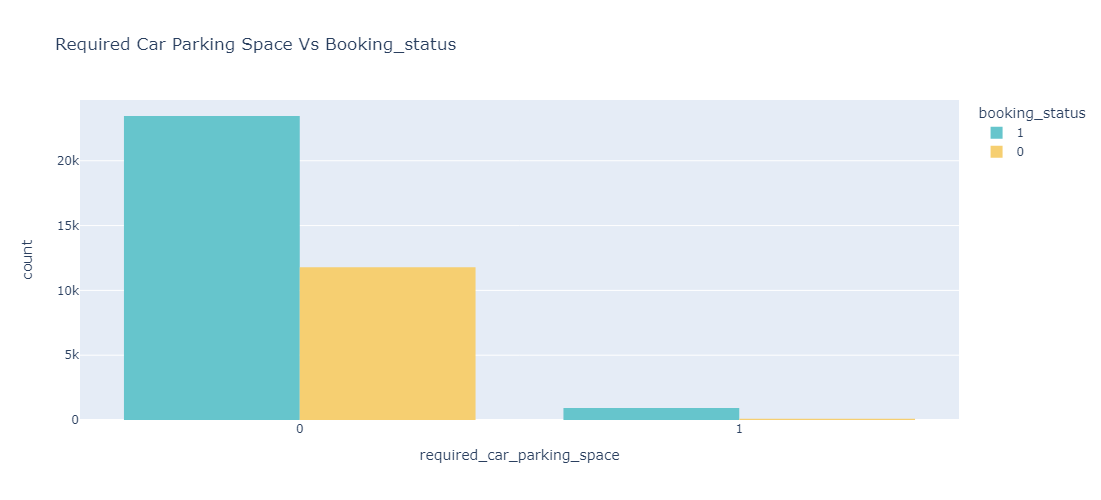

In [65]:
fig = px.histogram(df, x=df["required_car_parking_space"],color='booking_status', barmode='group',width=700,title="Required Car Parking Space Vs Booking_status",
                   color_discrete_sequence=px.colors.qualitative.Pastel,height=500)
fig.show()


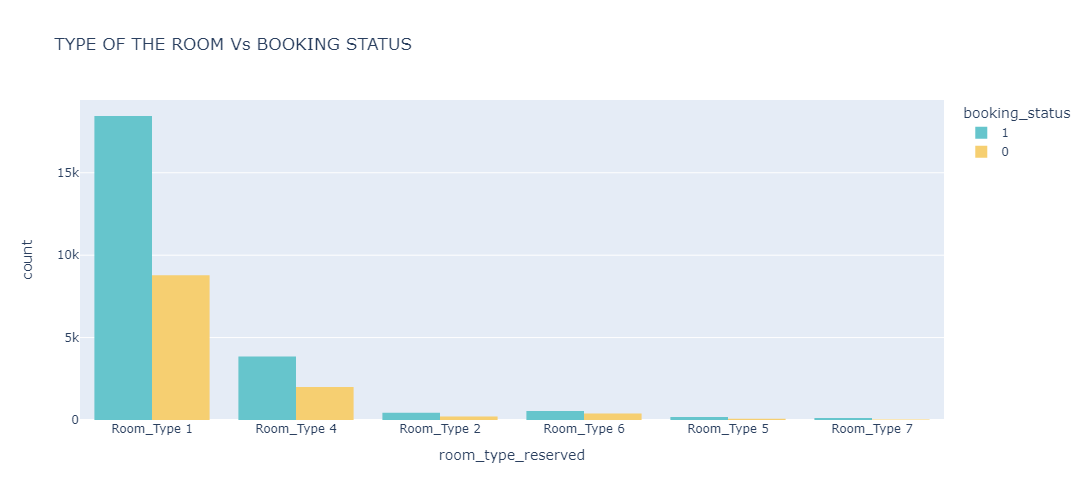

In [66]:
 
fig = px.histogram(df, x=df["room_type_reserved"],
             color='booking_status',color_discrete_sequence=px.colors.qualitative.Pastel, barmode='group',width=700,title="TYPE OF THE ROOM Vs BOOKING STATUS",
             height=500,)
fig.show()

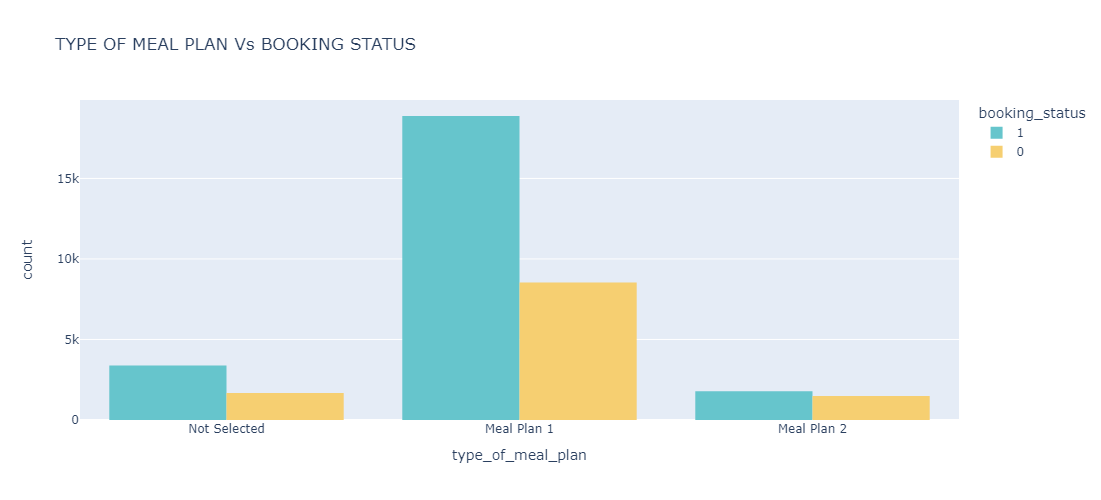

In [67]:
 
fig = px.histogram(df, x=df["type_of_meal_plan"],
             color='booking_status',color_discrete_sequence=px.colors.qualitative.Pastel, barmode='group',width=700,title="TYPE OF MEAL PLAN Vs BOOKING STATUS",
             height=500,)
fig.show()

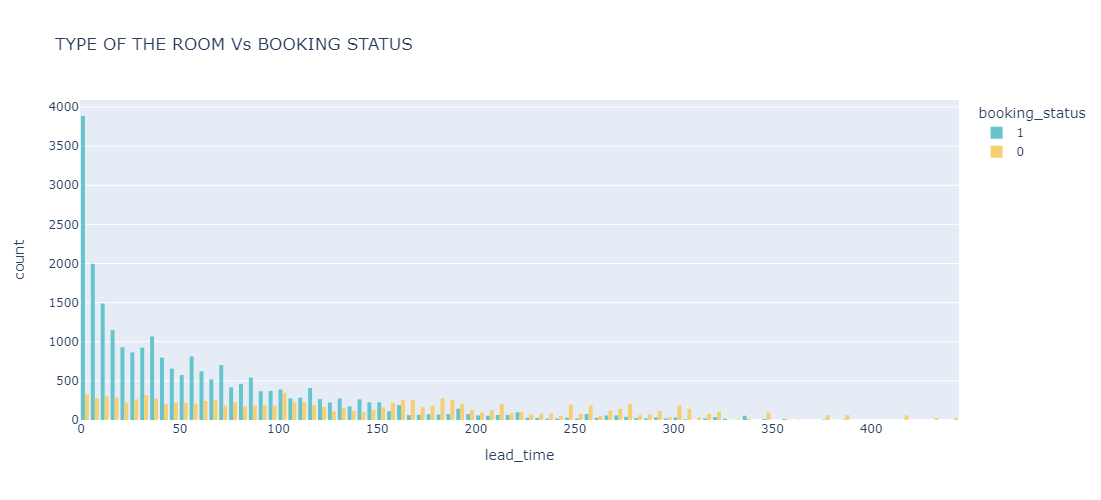

In [68]:
fig = px.histogram(df, x=df["lead_time"],
             color='booking_status',color_discrete_sequence=px.colors.qualitative.Pastel, barmode='group',width=1000,title="TYPE OF THE ROOM Vs BOOKING STATUS",
             height=500,)
fig.show()

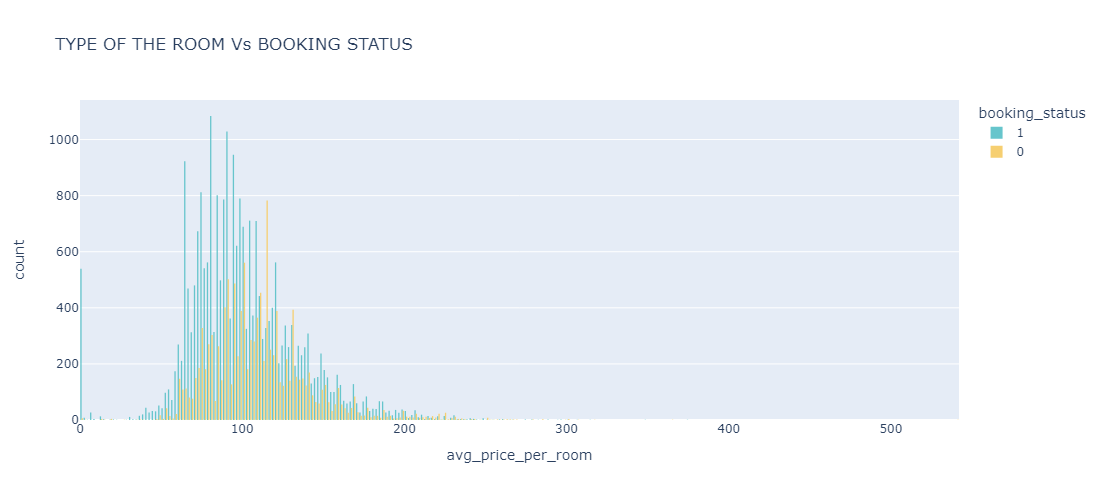

In [69]:
fig = px.histogram(df, x=df["avg_price_per_room"],
             color='booking_status',color_discrete_sequence=px.colors.qualitative.Pastel, barmode='group',width=1000,title="TYPE OF THE ROOM Vs BOOKING STATUS",
             height=500,)
fig.show()

In [71]:
 
count = df['market_segment_type'].value_counts()
print(count)

market_segment_type
Online           22262
Offline          10074
Corporate         1925
Complementary      369
Aviation           122
Name: count, dtype: int64


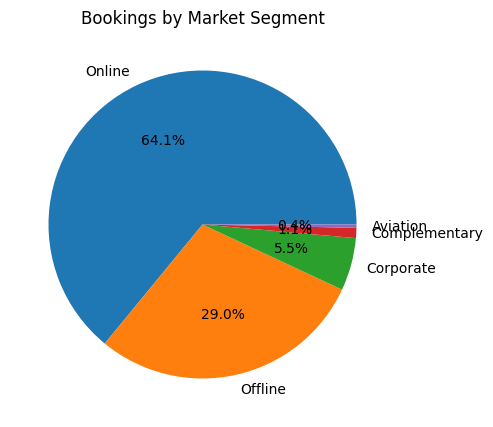

In [82]:
#plotthe distribution using piechart
plt.figure(figsize=(5,5))
plt.pie(count, labels=count.index, autopct='%1.1f%%')
plt.title('Bookings by Market Segment')

plt.show()